## Runme

```
./cmp-multik-multisig.py  SRR606249.sig ?.fa.sig ??.fa.sig > multik.csv
```

In [25]:
import csv
x = []
r = csv.reader(open('multik.csv'))

#a = next(r)
KSIZES = [21,31,51]
for against, query_name, query_file, *kvals in r:
    x.append((query_name, query_file, *[ float(i) for i in kvals ]))

print(len(x))
assert len(x) == 64

64


In [26]:
%matplotlib inline
import pylab

NC_007951.1 Burkholderia xenovorans LB400 chromosome 1, complete sequence
NZ_CP015081.1 Deinococcus radiodurans R1 chromosome 1, complete sequence
AE009951.2 Fusobacterium nucleatum subsp. nucleatum ATCC 25586, complete genome
CP000667.1 Salinispora tropica CNB-440, complete genome
NC_013968.1 Haloferax volcanii DS2 plasmid pHV1, complete sequence
NZ_KQ961402.1 Zymomonas mobilis strain ATCC 31823 Scaffold1, whole genome shotgun sequence
CP000031.2 Ruegeria pomeroyi DSS-3, complete genome
CP001013.1 Leptothrix cholodnii SP-6, complete genome
NC_011663.1 Shewanella baltica OS223, complete genome
AE017221.1 Thermus thermophilus HB27, complete genome
NZ_JGWU01000001.1 Bordetella bronchiseptica D989 ctg7180000008197, whole genome shotgun sequence
NC_008751.1 Desulfovibrio vulgaris DP4, complete genome
NZ_KE136524.1 Enterococcus faecalis V583 acyDH-supercont2.1, whole genome shotgun sequence
51


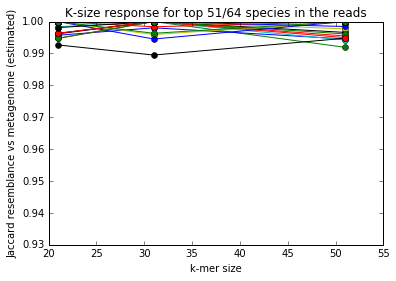

In [27]:
n = 0
for name, filename, *kvals in x:
    if kvals[-1] <= 0.99:
        print(name)
        continue
    pylab.plot(KSIZES, kvals, '-o')
    n += 1
    
pylab.axis(ymin=0.93)
pylab.title('K-size response for top 51/64 species in the reads')
pylab.xlabel('k-mer size')
pylab.ylabel('Jaccard resemblance vs metagenome (estimated)')
#pylab.legend(loc='upper right')
print(n)
pylab.savefig('top.pdf')

NC_007951.1 Burkholderia xenovorans LB400 chromosome 1, complete sequence ../genomes/7.fa.sig
NZ_CP015081.1 Deinococcus radiodurans R1 chromosome 1, complete sequence ../genomes/16.fa.sig
AE009951.2 Fusobacterium nucleatum subsp. nucleatum ATCC 25586, complete genome ../genomes/20.fa.sig
CP000667.1 Salinispora tropica CNB-440, complete genome ../genomes/46.fa.sig
NC_013968.1 Haloferax volcanii DS2 plasmid pHV1, complete sequence ../genomes/23.fa.sig
NZ_KQ961402.1 Zymomonas mobilis strain ATCC 31823 Scaffold1, whole genome shotgun sequence ../genomes/58.fa.sig
CP000031.2 Ruegeria pomeroyi DSS-3, complete genome ../genomes/44.fa.sig
CP001013.1 Leptothrix cholodnii SP-6, complete genome ../genomes/27.fa.sig
NC_011663.1 Shewanella baltica OS223, complete genome ../genomes/63.fa.sig
AE017221.1 Thermus thermophilus HB27, complete genome ../genomes/55.fa.sig
NZ_JGWU01000001.1 Bordetella bronchiseptica D989 ctg7180000008197, whole genome shotgun sequence ../genomes/6.fa.sig
NC_008751.1 Desulfo

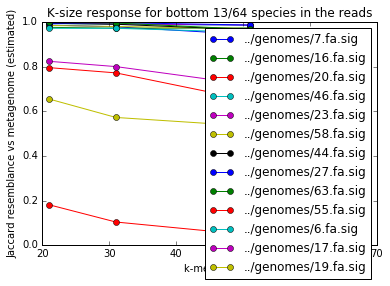

In [28]:
n = 0
for name, filename, *kvals in x:
    if kvals[-1] > 0.99:
        continue
    pylab.plot(KSIZES, kvals, '-o', label=filename)
    n += 1
    print(name, filename)
    
print(n)
    
pylab.axis(ymin=0.0, xmax=70)
pylab.legend(loc='upper right')
pylab.title('K-size response for bottom 13/64 species in the reads')
pylab.xlabel('k-mer size')
pylab.ylabel('Jaccard resemblance vs metagenome (estimated)')
pylab.savefig('bottom.pdf')

NC_007951.1 Burkholderia xenovorans LB400 chromosome 1, complete sequence
NZ_CP015081.1 Deinococcus radiodurans R1 chromosome 1, complete sequence
AE009951.2 Fusobacterium nucleatum subsp. nucleatum ATCC 25586, complete genome
CP000667.1 Salinispora tropica CNB-440, complete genome
NC_013968.1 Haloferax volcanii DS2 plasmid pHV1, complete sequence
NZ_KQ961402.1 Zymomonas mobilis strain ATCC 31823 Scaffold1, whole genome shotgun sequence
CP000031.2 Ruegeria pomeroyi DSS-3, complete genome
CP001013.1 Leptothrix cholodnii SP-6, complete genome
NC_011663.1 Shewanella baltica OS223, complete genome
AE017221.1 Thermus thermophilus HB27, complete genome
NZ_JGWU01000001.1 Bordetella bronchiseptica D989 ctg7180000008197, whole genome shotgun sequence
NC_008751.1 Desulfovibrio vulgaris DP4, complete genome
NZ_KE136524.1 Enterococcus faecalis V583 acyDH-supercont2.1, whole genome shotgun sequence
13


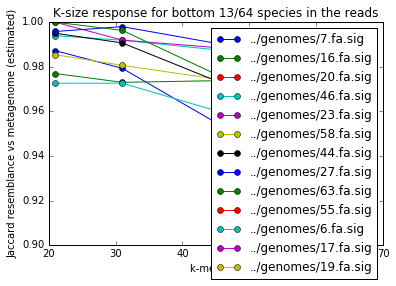

In [29]:
n = 0
for name, filename, *kvals in x:
    if kvals[-1] > 0.99:
        continue
    pylab.plot(KSIZES, kvals, '-o', label=filename)
    n += 1
    print(name)
    
print(n)
    
pylab.axis(ymin=0.9, xmax=70)
pylab.legend(loc='upper right')
pylab.title('K-size response for bottom 13/64 species in the reads')
pylab.xlabel('k-mer size')
pylab.ylabel('Jaccard resemblance vs metagenome (estimated)')
pylab.savefig('bottom.pdf')

2


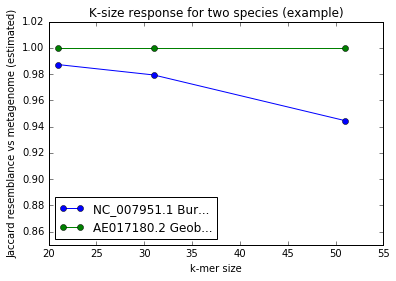

In [30]:
n = 0
for name, filename, *kvals in x:
    if not (name.startswith('AE017180.2 Geobacter') or name.startswith('NC_007951.1 Burkholderia')):
        continue
    pylab.plot(KSIZES, kvals, '-o', label=name[:15] + '...')
    #print(name)
    n += 1
    
pylab.axis(ymin=0.85, ymax=1.02)
pylab.title('K-size response for two species (example)')
pylab.xlabel('k-mer size')
pylab.ylabel('Jaccard resemblance vs metagenome (estimated)')
pylab.legend(loc='lower left')
print(n)
pylab.savefig('example.pdf')